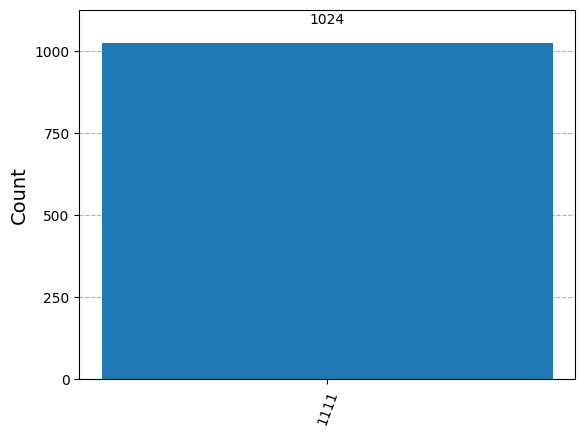

In [12]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    # 平衡函数
    if case == "balanced":
        # [1,2**n)间的随机整数 b
        b = np.random.randint(1, 2**n)
        # 得到 b 对应的二进制字符串
        b_str = format(b, '0'+str(n)+'b')
        # 若 b_str[qubit] 为 '1'，则在 q[qubit] 上添加一个 X 门
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # 每个量子比特上添加 CNOT 门, q[n] 为目标量子比特
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # 若 b_str[qubit] 为 '1'，则在 q[qubit] 上添加一个 X 门
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # 常值函数
    if case == "constant":
        # 取随机整数 0 或 1, 若为 1, 则在 q[n] 上添加一个 X 门
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    # 将量子线路 oracle_qc 封装为自定义门
    oracle_gate.name = "Oracle"
    return oracle_gate


def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # 设置输出量子比特
    dj_circuit.x(n)
    dj_circuit.h(n)
    # 设置输入寄存器
    for qubit in range(n):
        dj_circuit.h(qubit)
    # 添加 Oracle 门
    dj_circuit.append(oracle, range(n+1))
    # 输入寄存器各量子比特上添加 H 门
    for qubit in range(n):
        dj_circuit.h(qubit)
    # 测量输入寄存器
    for i in range(n):
        dj_circuit.measure(i, i)
    return dj_circuit



# 库函数输入
import numpy as np
from qiskit import assemble
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# 创建 Oracle 自定义门（常值函数），实现 Deutsch-Jozsa 算法的量子线路
n = 4
oracle_gate = dj_oracle('balanced', n)
# 测试平衡函数时，首参为 'balanced'

dj_circuit = dj_algorithm(oracle_gate, n)
#dj_circuit.draw(output='mpl',filename='qc3.png')#获得png图片

# 选择模拟器
simu = Aer.get_backend('aer_simulator')

# 编译电路
transpiled_dj_circuit = transpile(dj_circuit, simu)

# 运行电路并获取结果
results = simu.run(transpiled_dj_circuit).result()

# 获取测量结果
answer = results.get_counts(dj_circuit)

# 绘制直方图
out = plot_histogram(answer)
out.savefig('balanced')
out